# Streaming Platform Analysis


In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Objective 1: Profile & QA the data

In [23]:
# Load Data
data = pd.read_csv("Streaming-Data/data2.csv")

In [24]:
data.head(10)

,id,date,time_slot,total_user_time_spent_in_mins,total_ads_watched_in_mins,ads_clicked,user_time_spent_versionB_in_mins,ads_watched_vesionB_in_mins,ads_clicked_versionB
0,0,2020-06-01,00:00-05:59,324994,2949,12,214496,2949,8
1,1,-,06:00-11:59,399151,33612,0,275414,5151,0
2,2,-,12:00-17:59,573081,34410,7,229232,2045,4
3,3,-,18:00-23:59,276034,5869,22,69008,1934,6
4,4,2020-06-02,00:00-05:59,440189,34321,15,286122,14176,7
5,5,-,06:00-11:59,378407,22500,10,121090,2106,6
6,6,-,12:00-17:59,439008,36351,22,316085,6564,6
7,7,-,18:00-23:59,286749,17542,27,117567,729,13
8,8,2020-06-03,00:00-05:59,481207,34803,15,312784,4801,10
9,9,-,06:00-11:59,417256,32339,22,254526,12227,12


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                120 non-null    int64 
 1   date                              120 non-null    object
 2   time_slot                         120 non-null    object
 3   total_user_time_spent_in_mins     120 non-null    int64 
 4   total_ads_watched_in_mins         120 non-null    int64 
 5   ads_clicked                       120 non-null    int64 
 6   user_time_spent_versionB_in_mins  120 non-null    int64 
 7   ads_watched_vesionB_in_mins       120 non-null    int64 
 8   ads_clicked_versionB              120 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 8.6+ KB


#### Forward-filling the 'date' column by replacing '-' with a date

In [26]:

for index, row in data.iterrows():
    if row['date'] != '-':
        date_copy = pd.to_datetime(row['date']).date()  # get only the date part
    else:
        data.at[index, 'date'] = date_copy

print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                120 non-null    int64 
 1   date                              120 non-null    object
 2   time_slot                         120 non-null    object
 3   total_user_time_spent_in_mins     120 non-null    int64 
 4   total_ads_watched_in_mins         120 non-null    int64 
 5   ads_clicked                       120 non-null    int64 
 6   user_time_spent_versionB_in_mins  120 non-null    int64 
 7   ads_watched_vesionB_in_mins       120 non-null    int64 
 8   ads_clicked_versionB              120 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 8.6+ KB
None


,id,date,time_slot,total_user_time_spent_in_mins,total_ads_watched_in_mins,ads_clicked,user_time_spent_versionB_in_mins,ads_watched_vesionB_in_mins,ads_clicked_versionB
0,0,2020-06-01,00:00-05:59,324994,2949,12,214496,2949,8
1,1,2020-06-01,06:00-11:59,399151,33612,0,275414,5151,0
2,2,2020-06-01,12:00-17:59,573081,34410,7,229232,2045,4
3,3,2020-06-01,18:00-23:59,276034,5869,22,69008,1934,6
4,4,2020-06-02,00:00-05:59,440189,34321,15,286122,14176,7
5,5,2020-06-02,06:00-11:59,378407,22500,10,121090,2106,6
6,6,2020-06-02,12:00-17:59,439008,36351,22,316085,6564,6
7,7,2020-06-02,18:00-23:59,286749,17542,27,117567,729,13
8,8,2020-06-03,00:00-05:59,481207,34803,15,312784,4801,10
9,9,2020-06-03,06:00-11:59,417256,32339,22,254526,12227,12


In [27]:
data.describe()

,id,total_user_time_spent_in_mins,total_ads_watched_in_mins,ads_clicked,user_time_spent_versionB_in_mins,ads_watched_vesionB_in_mins,ads_clicked_versionB
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,59.500000,366175.866667,19056.925000,15.366667,178460.600000,6374.233333,7.300000
std,34.785054,104302.139577,12627.438913,9.537131,74772.402373,4985.369500,5.144304
min,0.000000,99220.000000,214.000000,0.000000,44103.000000,10.000000,0.000000
25%,29.750000,304001.500000,7693.250000,9.000000,117314.000000,2350.750000,3.000000
50%,59.500000,364830.000000,17663.000000,14.500000,162876.500000,5385.000000,6.500000
75%,89.250000,433745.250000,29109.750000,22.250000,225329.750000,9405.750000,11.000000
max,119.000000,618404.000000,54816.000000,39.000000,375540.000000,29073.000000,21.000000


Assuming that the total_user_time_spent_in_mins, total_ads_watched_in_mins, ads_clicked were calculated correctly using the original values from versionA + versionB data, 
I will now create columns for versionA for these metrics.

In [54]:
data.rename(columns={'ads_watched_vesionB_in_mins': 'ads_watched_versionB_in_mins'}, inplace=True)

data['user_time_spent_versionA_in_mins'] = data['total_user_time_spent_in_mins'] - data['user_time_spent_versionB_in_mins']
data['ads_watched_versionA_in_mins'] = data['total_ads_watched_in_mins'] - data['ads_watched_versionB_in_mins']
data['ads_clicked_versionA'] = data['ads_clicked'] - data['ads_clicked_versionB']

data.head(10)

data.info()
print(data[['user_time_spent_versionB_in_mins', 'user_time_spent_versionA_in_mins']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                120 non-null    int64  
 1   date                              120 non-null    object 
 2   time_slot                         120 non-null    object 
 3   total_user_time_spent_in_mins     120 non-null    int64  
 4   total_ads_watched_in_mins         120 non-null    int64  
 5   ads_clicked                       120 non-null    int64  
 6   user_time_spent_versionB_in_mins  120 non-null    int64  
 7   ads_watched_versionB_in_mins      120 non-null    int64  
 8   ads_clicked_versionB              120 non-null    int64  
 9   user_time_spent_versionA_in_mins  120 non-null    int64  
 10  ads_watched_versionA_in_mins      120 non-null    int64  
 11  ads_clicked_versionA              120 non-null    int64  
 12  ads_clic

### Objective 2 : Identify the ratio of ad clicks over the average time spent watching ads

In [ ]:
## Ratio of ad clicks over avg time spent watching ads
data['ads_clicked_ratio'] = data['ads_clicked']/data['total_ads_watched_in_mins']
print(f"Ratio of ad clicks over avg time spent watching ads: {data['ads_clicked_ratio'].mean()}") 

Ratio of ad clicks over avg time spent watching ads: 0.0027828973203860236



### Objective 3 : Calculate Max ad screen time ratio per date

In [48]:
## Objective 2 : Max ad screen time ratio per date
data['date'] = pd.to_datetime(data['date']).dt.date

data['ad_screen_time_ratio'] = data['total_ads_watched_in_mins']/data['total_user_time_spent_in_mins']

max_ratio_per_date = data.groupby('date')['ad_screen_time_ratio'].max().reset_index()

print(max_ratio_per_date)

          date  ad_screen_time_ratio
0   2020-06-01              0.084209
1   2020-06-02              0.082803
2   2020-06-03              0.077504
3   2020-06-04              0.099129
4   2020-06-05              0.038243
5   2020-06-06              0.074984
6   2020-06-07              0.083880
7   2020-06-08              0.086926
8   2020-06-09              0.082972
9   2020-06-10              0.094537
10  2020-06-11              0.078152
11  2020-06-12              0.078936
12  2020-06-13              0.077687
13  2020-06-14              0.071059
14  2020-06-15              0.094633
15  2020-06-16              0.099147
16  2020-06-17              0.071640
17  2020-06-18              0.090568
18  2020-06-19              0.084760
19  2020-06-20              0.087635
20  2020-06-21              0.067173
21  2020-06-22              0.097344
22  2020-06-23              0.099785
23  2020-06-24              0.087086
24  2020-06-25              0.091588
25  2020-06-26              0.076994
2

Text(0, 0.5, 'Max Ad Screen Time Ratio')

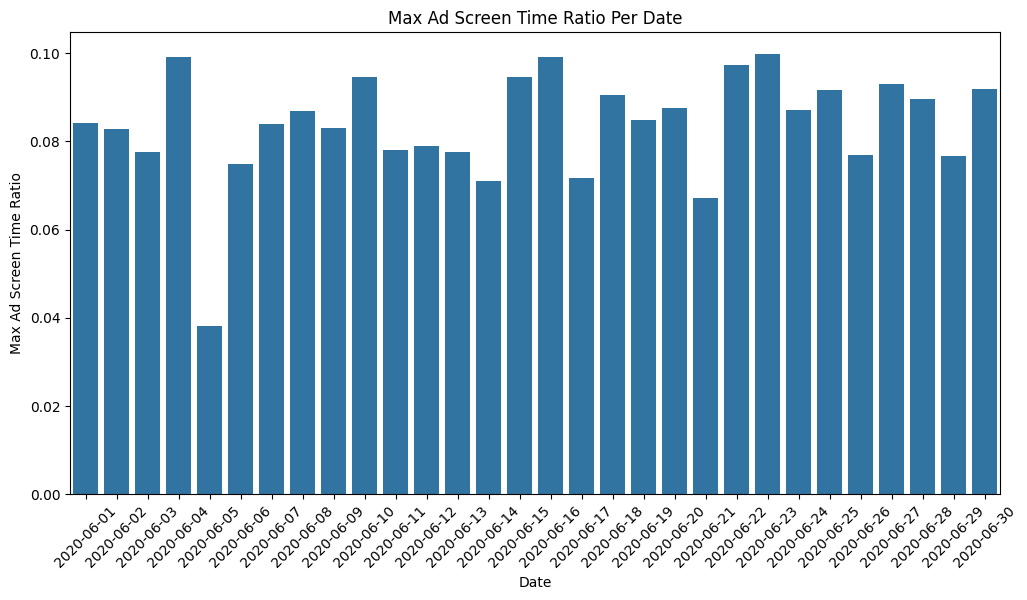

In [37]:
plt.figure(figsize=(12,6))
#sns.lineplot(data=max_ratio_per_date, x='date' ,y='ad_screen_time_ratio')
sns.barplot(data=max_ratio_per_date, x='date' ,y='ad_screen_time_ratio')

plt.title('Max Ad Screen Time Ratio Per Date') 
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Max Ad Screen Time Ratio')

In [39]:
max_row = max_ratio_per_date.loc[max_ratio_per_date['ad_screen_time_ratio'].idxmax()]
print(f"Date with max ad screen time ratio: {max_row['date']}, Ratio: {max_row['ad_screen_time_ratio']}")

Date with max ad screen time ratio: 2020-06-23, Ratio: 0.0997848610836138


### Objective 4 : Calculate Max ad screen time ratio per timeslot

In [40]:
max_ratio_per_timeslot = data.groupby('time_slot')['ad_screen_time_ratio'].max().reset_index()

print("Max ad screen time ratio per timeslot:")
print(max_ratio_per_timeslot)

Max ad screen time ratio per timeslot:
     time_slot  ad_screen_time_ratio
0  00:00-05:59              0.099785
1  06:00-11:59              0.099147
2  12:00-17:59              0.091929
3  18:00-23:59              0.099129


In [41]:
max_ratio_timeslot_row = max_ratio_per_timeslot.loc[max_ratio_per_timeslot['ad_screen_time_ratio'].idxmax()]
print(f"Time slot with max ad screen time ratio: {max_ratio_timeslot_row['time_slot']}, Ratio: {max_ratio_timeslot_row['ad_screen_time_ratio']}")

Time slot with max ad screen time ratio: 00:00-05:59, Ratio: 0.0997848610836138


## Objective 5 : Compare viewership in versionA and B
Find the consecutive 3 days in a week with min viewership in each version
Compare min viewership from both versions

In [42]:
viewership_by_date = data.groupby('date').agg({"user_time_spent_versionA_in_mins": "sum", "user_time_spent_versionB_in_mins": "sum"}).reset_index()
#[['user_time_spent_versionA_in_mins', 'user_time_spent_versionB_in_mins']].sum().reset_index()
print(viewership_by_date)

print(viewership_by_date.describe())

          date  user_time_spent_versionA_in_mins  \
0   2020-06-01                            785110   
1   2020-06-02                            703489   
2   2020-06-03                            629264   
3   2020-06-04                            918768   
4   2020-06-05                            944310   
5   2020-06-06                            714502   
6   2020-06-07                            759528   
7   2020-06-08                            522413   
8   2020-06-09                            639629   
9   2020-06-10                            551970   
10  2020-06-11                            907510   
11  2020-06-12                            791794   
12  2020-06-13                            832020   
13  2020-06-14                            552785   
14  2020-06-15                            552273   
15  2020-06-16                            866708   
16  2020-06-17                            686400   
17  2020-06-18                            707573   
18  2020-06-

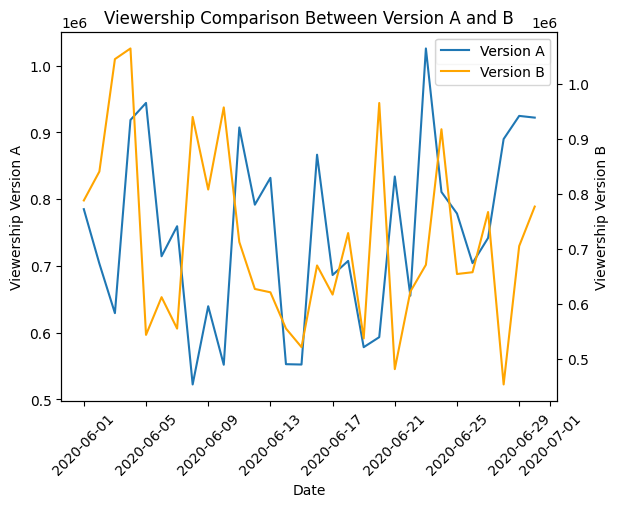

In [43]:
fig, ax = plt.subplots()
sns.lineplot(data=viewership_by_date, x='date', y='user_time_spent_versionA_in_mins', ax=ax, label='Version A')
ax.set_xlabel('Date')
ax.set_ylabel('Viewership Version A')
plt.xticks(rotation=45)

ax2 = ax.twinx()
sns.lineplot(data=viewership_by_date, x='date', y='user_time_spent_versionB_in_mins', ax=ax2, color='orange', label='Version B')
ax2.set_ylabel('Viewership Version B')

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Viewership Comparison Between Version A and B')
plt.show()

My observation from the above dual-axis graph - Due to some factors (not covered as part of this analysis), viewership of version A and version B seem to be inversely proportional. 

In [44]:
view_in_week = pd.DataFrame(columns=['date', 'versionA', 'versionB'])
for index, dt1 in viewership_by_date.iterrows():
    view_in_week.at[index,'date'] = viewership_by_date.at[index, 'date']
    view_in_week.at[index,'versionA'] = (viewership_by_date.at[index, 'user_time_spent_versionA_in_mins']  +
                                viewership_by_date.at[index+1, 'user_time_spent_versionA_in_mins']  +
                                viewership_by_date.at[index+2, 'user_time_spent_versionA_in_mins'] 
                               )
    
    view_in_week.at[index,'versionB'] = (viewership_by_date.at[index, 'user_time_spent_versionB_in_mins']  +
                                viewership_by_date.at[index+1, 'user_time_spent_versionB_in_mins']  +
                                viewership_by_date.at[index+2, 'user_time_spent_versionB_in_mins'] 
                               )
    
    if index+2 >= len(viewership_by_date)-1:
        break
    
print(view_in_week)

          date versionA versionB
0   2020-06-01  2117863  2674736
1   2020-06-02  2251521  2951726
2   2020-06-03  2492342  2654113
3   2020-06-04  2577580  2220371
4   2020-06-05  2418340  1709910
5   2020-06-06  1996443  2107005
6   2020-06-07  1921570  2303077
7   2020-06-08  1714012  2706125
8   2020-06-09  2099109  2478220
9   2020-06-10  2251274  2297077
10  2020-06-11  2531324  1960176
11  2020-06-12  2176599  1802614
12  2020-06-13  1937078  1696645
13  2020-06-14  1971766  1745573
14  2020-06-15  2105381  1807371
15  2020-06-16  2260681  2015250
16  2020-06-17  1972225  1882212
17  2020-06-18  1879102  2231327
18  2020-06-19  2005573  1983361
19  2020-06-20  2082739  2068760
20  2020-06-21  2515380  1773879
21  2020-06-22  2492223  2210964
22  2020-06-23  2615350  2243021
23  2020-06-24  2293657  2229516
24  2020-06-25  2224721  2078748
25  2020-06-26  2336338  1877514
26  2020-06-27  2556962  1925186
27  2020-06-28  2737269  1935043


In [45]:
# Find the consecutive 3 days in a week with min viewership in each version
from datetime import timedelta

min_view_verA = view_in_week.at[view_in_week['versionA'].idxmin(),'date']

date1 = pd.to_datetime(min_view_verA) + timedelta(days=1)
date2 = pd.to_datetime(min_view_verA) + timedelta(days=2)

print(f"Minimum viewership for 3 consecutive days in version A is on : {min_view_verA}, {date1.date()}, {date2.date()}")

min_view_verB = view_in_week.at[view_in_week['versionB'].idxmin(),'date']

date1 = pd.to_datetime(min_view_verB) + timedelta(days=1)
date2 = pd.to_datetime(min_view_verB) + timedelta(days=2)

print(f"Minimum viewership for 3 consecutive days in version B is on : {min_view_verB}, {date1.date()}, {date2.date()}")


Minimum viewership for 3 consecutive days in version A is on : 2020-06-08, 2020-06-09, 2020-06-10
Minimum viewership for 3 consecutive days in version B is on : 2020-06-13, 2020-06-14, 2020-06-15


### Objective 5: Number of days with more ads clicked in A than B in avg

In [46]:
ads_clicked_A_vs_B = data.groupby('date').agg({"ads_clicked_versionA": "sum", "ads_clicked_versionB": "sum"}).reset_index()

ads_clicked_A_vs_B['versionA_is_greater'] = ads_clicked_A_vs_B['ads_clicked_versionA'] > ads_clicked_A_vs_B['ads_clicked_versionB']

print(f"Number of days with more ads clicked in A than B : {ads_clicked_A_vs_B['versionA_is_greater'].value_counts()[True]}")

Number of days with more ads clicked in A than B : 18


## Objective 6 : Time_slot with lowest percentage of ads watched over all ads watched

In [47]:
overall_ads_watched = data['total_ads_watched_in_mins'].sum()

ads_watched = data.groupby('time_slot').agg({'total_ads_watched_in_mins': 'sum'}).reset_index()
ads_watched['pcnt_ads_watched'] = ((ads_watched['total_ads_watched_in_mins']/overall_ads_watched) * 100)
#print(ads_watched)

print("Time slot with lowest percentage of ads watched:")
print(ads_watched.at[ads_watched['pcnt_ads_watched'].idxmin(), 'time_slot'])

Time slot with lowest percentage of ads watched:
00:00-05:59


Because few people watch overnight, that slot has the lowest share of total ad minutes—but within those sessions, ads occupy a larger share of viewing time than in other slots.

### Quick findings

- **Timeframe:** The data covers **June 1–30, 2020** (30 days).

- **Typical day (watch time):**
  - **Version A:** about **750k minutes/day**
  - **Version B:** about **714k minutes/day**
  > In short, people watched a little more on **Version A** than on **Version B** on an average day.

- **Busiest days:**
  - **Most total minutes:** **June 4, 2020** (~1.98M minutes)
  - **Version B peak:** **June 4, 2020**
  - **Version A peak:** **June 23, 2020**

- On 18 of 30 days, Version A had **more ad clicks** than Version B.

- **Overnight vs. the rest:**  
  - **Overnight (00:00–05:59)** accounts for the **smallest share of all ad minutes watched** (very few people watch then).  
  - At the same time, it has the **highest ad load** (ads take a bigger slice of the small amount of viewing that happens at night).  
  > These are not contradictory—they use different denominators: one is the **share of total ad minutes** (volume), the other is **ad minutes vs. viewing minutes** (ratio).
